### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd
import os
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


### Get Data

In [2]:
def line(x,a,b):
    return ((a*x) + b)

def get_data(path):
    paths_list = []
    only_filename_list = []
    for root, subdirs, files in os.walk(path):
        for file in files:
            if file[-4:] == '.csv':
                paths_list.append(os.path.join(root, file))
                only_filename_list.append(file)
    return paths_list, only_filename_list

class Data_csv:
    def __init__(self, name, data, filename, coef, intercept):
        self.name = name
        self.data = data
        self.filename = filename
        self.coef = coef
        self.intercept = intercept

paths_list, filenames_list = get_data('Data_Linear_Regression')
class_data_list = []

i = 0
for i in range(len(paths_list)):
    class_data_list.append(Data_csv(paths_list[i], pd.read_csv(paths_list[i]), filenames_list[i],None, None))
    #class_data_list[i].data.drop(columns = ['Unnamed: 0'], inplace = True)
    if class_data_list[i].filename.index('C') == 1:
        class_data_list[i].data['Current'] = int(filenames_list[i][0])
    else:
        class_data_list[i].data['Current'] = int(filenames_list[i][0:2]) 
    


### Train Model

Model fits a line with equation **aX+b**

    a = intercept_
    
    b = coef_


In [3]:
i = 0
for i in range(len(class_data_list)):
    regr  =linear_model.LinearRegression()
    train_test = {}
    X_train, X_test, y_train, y_test = train_test_split(class_data_list[i].data['x'].values.reshape(-1,1), class_data_list[i].data['y'].values.reshape(-1,1), test_size=0.2, random_state=42)
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    class_data_list[i].coef = regr.coef_
    class_data_list[i].intercept = regr.intercept_
    class_data_list[i].y_pred = y_pred
    class_data_list[i].train_test = {"X_train":X_train, "X_test":X_test, "y_train":y_train, "y_test":y_test}

    class_data_list[i].mse = mean_squared_error(y_test, y_pred)
    class_data_list[i].r2_score = r2_score(y_test, y_pred)



### Visualize Results

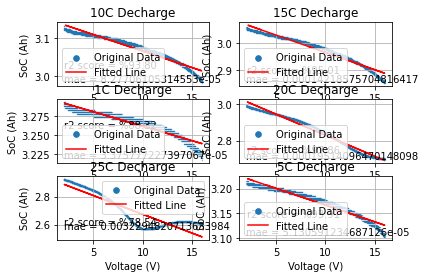

In [4]:
i = 0
for i in range(len(class_data_list)):
    
    plt.subplot(3,2,i+1)
    plt.scatter(class_data_list[i].data["x"], class_data_list[i].data["y"], s = 0.05)
    plt.plot(class_data_list[i].train_test["X_test"], class_data_list[i].y_pred, 'r')
    plt.legend(('Original Data', 'Fitted Line'), markerscale = 25)
    plt.xlabel('Voltage (V)')
    plt.ylabel('SoC (Ah)')
    plt.title(str(class_data_list[i].data["Current"].iloc[0])+"C Decharge")
    plt.text(min(class_data_list[i].data["x"])*1.001,min(class_data_list[i].data["y"])*1.001,"mae = "+str(class_data_list[i].mse))
    plt.text(min(class_data_list[i].data["x"])*1.008,min(class_data_list[i].data["y"])*1.013,"r2 score = %"+str(class_data_list[i].r2_score * 100)[:5])
    plt.grid()

### Average of 6 different data errors

In [5]:
i = 0
mse = []
r2 = []
for i in range(len(class_data_list)):
    mse.append(class_data_list[i].mse)
    r2.append(class_data_list[i].r2_score*100)

mse = np.array(mse)
mse_average = np.mean(mse)
r2 = np.array(r2)
r2_average = np.mean(r2)
print("mse average:     ", mse_average)
print("r2 score average: %.4f" % r2_average + "%")


mse average:      0.0006224405147108902
r2 score average: 91.2469%


In [6]:
class_data_list[0].mse

8.27706105314553e-05